In [162]:
from random import choice
import numpy as np
from decimal import Decimal
import pandas as pd

# Solução Genética de uma Função

**Problema**

Implemente um algoritmo genético que busca maximizar a seguinte equação:

$$f(𝑥,𝑦)=−𝑥^2−𝑦^2+6𝑥+4𝑦$$

A solução ótima ocorre em 𝑥=3 e 𝑦=2. Ao substituir as variáveis 𝑥 e 𝑦 na equação pelos valores indicados, obtemos o resultado 𝑓(3,2)=13.

Requisitos da implementação:
* *Representação dos indivíduos*: Cada indivíduo da população deve representar um par de valores (𝑥,𝑦). 
* *Operadores*: O grupo deve escolher e implementar os operadores de seleção, cruzamento e mutação que serão usados pelo seu algoritmo genético. 
* Saída: O programa deve apresentar, para cada geração, qual é o melhor indivíduo e o valor da sua aptidão. Ao final da execução do algoritmo, o programa deve apresentar o resultado obtido para 𝑥 e 𝑦.

## Execução

A própria função matemática que se deseja otimizar funciona como medida de aptidão: quanto maior o valor de $f(x,y)$ de uma solução candidata, mais apta ela está de encontrar o maior resultado possível.

In [163]:
def função(x,y):
    x, y = Decimal(x), Decimal(y)
    return - x**2 - y**2 + 6*x + 4*y

Passos:
* Cria $P$ pais
* --- Primeira geração ---
* Cria $F$ filhos para cada pai
* Os filhos têm seus valores X e Y mudados a partir de seus pais ($TaxaMutação$ e $EscalaMutação$)
* Mede a aptidão dos filhos
* Inclui os pais e os filhos no grupo de teste
* Filtra os $P$ melhores candidatos
* Decide se encerra os ciclos pelo máximo de gerações ou quando um candidato atinge a aptidão máxima.
* --- Próxima geração

**Mutações**  
São valores aleatórios somados ou subtraídos do pai para o filho.  
Esses valores variam de $-TxM$ a $+TxM$, fragmentado em $EsM$.  
Cada pai gera $F$ filhos, que herdam suas características e sofrem mutações.  
Nenhum filho terá as exatas mesmas características de seus pais, nem de seus irmãos.  

In [164]:
# Classe de soluções candidatas

class Candidato:
    def __init__(self):
        self.x = 0
        self.y = 0
        self.f = 0.0

    # O método de mutação é responsável por alterar as características do Candidato
    #  com base em seu pai recebendo valores fixos,
    #  aleatorizados na função de reprodução
    def mutação(self, pai, mutação_x, mutação_y):
        '''Faz que o filho herde o valor do pai e aplique a mutação.
        A mutação é feita com base na taxa de mutação e na escala de mutação.'''
        self.x = pai.x + mutação_x
        self.y = pai.y + mutação_y
        self.f = função(self.x, self.y)

In [165]:
def reprodução(pai,n_filhos,taxa_mutação,escala_mutação):
    mutações = []
    # O loop a seguir garante que não haja mutações repetidas
    while len(mutações) < n_filhos:
        alcance = np.arange(-taxa_mutação, +taxa_mutação, escala_mutação)
        alteração = (choice(alcance), choice(alcance))
        if alteração not in mutações and alteração != (0,0):
            mutações.append(alteração)
    ninho = [Candidato() for _ in range(n_filhos)]
    for i in range(n_filhos):
        # Aplicando a mutação
        ninho[i].mutação(pai, mutações[i][0], mutações[i][1])
    # O resultado é o uma lista de filhos
    return ninho

In [166]:
def filtro(bando, n_pais):
    '''Filtra os filhos, mantendo apenas os n_pais com maior valor de aptidão.'''
    bando.sort(key=lambda x: x.f, reverse=True)
    return bando[:n_pais]

In [167]:
def primeira_geração(n_pais,taxa_mutação,escala_mutação):
    '''Gera a primeira geração com o número de pais.'''
    return reprodução(Candidato(),n_pais,taxa_mutação,escala_mutação)

In [168]:
def demonstração(bando,geração,max_aptidão, n_exibidos=1):
    '''Exibe os melhores indivíduos da geração.'''
    print(f'''
    Melhores indivíduos da {geração}ª geração:''')
    bando.sort(key=lambda x: x.f, reverse=True)
    for candidato in bando[:n_exibidos]:
        if candidato.f == max_aptidão:
            print(f'X: {candidato.x:.3f} Y: {candidato.y:.3f} F: {candidato.f:.20f} *')
        else:
            print(f'X: {candidato.x:.3f} Y: {candidato.y:.3f} F: {candidato.f:.20f} ')

A função de evolução é responsável por gerar ciclos reprodutivos e demonstrar os melhores candidatos.  
O ciclo é interrompido quando o número máximo de gerações é atingido ou quando o resultado da função é encontrado.

In [169]:
def evolução(
        n_filhos = 10, 
        n_pais = 1, 
        taxa_mutação = 1, 
        escala_mutação = 0.1, 
        max_gerações = 100, 
        max_aptidão = np.nan):
    '''Executa o algoritmo genético.
    O loop termina quando a geração máxima a aptidão máxima é atingida.'''
    # Tratamento de erros
    if taxa_mutação < escala_mutação*2:
        raise ValueError('A taxa de mutação deve menor ou igual ao dobro da escala de mutação.')
    if taxa_mutação <= 0:
        raise ValueError('A taxa de mutação deve ser maior que zero.')
    if escala_mutação <= 0:
        raise ValueError('A escala de mutação deve ser maior que zero.')
    ciclo = True
    pais  = primeira_geração(n_pais,taxa_mutação,escala_mutação)
    geração = 0
    demonstração(pais,geração,max_aptidão)

    # Lista incluindo melhores resultados de cada geração
    # Esta lista será retornada para a entrada do gráfico posterior
    result = []

    while ciclo:
        geração +=1
        bando = []
        gen = pd.DataFrame(columns=['x', 'y', 'z'])
        # Gerando os filhos
        for pai in pais:
            bando += reprodução(pai,n_filhos,taxa_mutação,escala_mutação)
        bando += pais
        # Filtrando os candidatos
        pais = filtro(bando, n_pais)
        # Demonstração da geração:
        demonstração(pais,geração,max_aptidão)
        if max_aptidão != np.nan:
            for indivíduo in pais:
                if indivíduo.f == max_aptidão:
                    ciclo = False
        
        for pai in pais:
            gen.loc[len(gen)] = {'x': pai.x, 'y': pai.y, 'z': pai.f}
        
        result.append(gen.astype(float)) #Alterando os resultados para float porque o matplotlib não sabe o que é decimal

        if geração == max_gerações:
            ciclo = False
    
    return result

In [227]:
def main():
    '''Função principal. Executa o algoritmo genético.'''
    # Parâmetros do algoritmo
    n_filhos = 5
    n_pais = 3
    taxa_mutação = 1
    escala_mutação = 0.2
    max_gerações = 100
    max_aptidão = 13.0
    # Executando o algoritmo genético
    return evolução(n_filhos, n_pais, taxa_mutação, escala_mutação, max_gerações, max_aptidão)

result = main()


    Melhores indivíduos da 0ª geração:
X: 0.400 Y: 0.200 F: 2.99999999999999733546 

    Melhores indivíduos da 1ª geração:
X: 0.200 Y: 1.000 F: 4.15999999999999570122 

    Melhores indivíduos da 2ª geração:
X: 0.600 Y: 1.800 F: 7.19999999999999573674 

    Melhores indivíduos da 3ª geração:
X: 1.000 Y: 1.200 F: 8.35999999999999232614 

    Melhores indivíduos da 4ª geração:
X: 1.400 Y: 2.000 F: 10.43999999999999772626 

    Melhores indivíduos da 5ª geração:
X: 2.000 Y: 1.800 F: 11.95999999999999729994 

    Melhores indivíduos da 6ª geração:
X: 2.800 Y: 1.800 F: 12.91999999999999992895 

    Melhores indivíduos da 7ª geração:
X: 3.000 Y: 2.000 F: 12.99999999999999822364 

    Melhores indivíduos da 8ª geração:
X: 3.000 Y: 2.000 F: 12.99999999999999822364 

    Melhores indivíduos da 9ª geração:
X: 3.000 Y: 2.000 F: 12.99999999999999822364 

    Melhores indivíduos da 10ª geração:
X: 3.000 Y: 2.000 F: 13.00000000000000000000 *


In [211]:
for i in result:
    print(type(i))
    print(len(i))
    print(i.head(4))

<class 'pandas.core.frame.DataFrame'>
3
      x     y       z
0 -0.35  0.65 -0.0450
1 -0.55  0.70 -1.2925
2 -0.50  0.25 -2.3125
<class 'pandas.core.frame.DataFrame'>
3
      x     y       z
0 -0.10  0.75  1.8275
1 -0.35  0.65 -0.0450
2 -0.30  0.45 -0.2925
<class 'pandas.core.frame.DataFrame'>
3
      x     y       z
0  0.25  0.85  4.1150
1  0.05  0.50  2.0475
2 -0.10  0.75  1.8275
<class 'pandas.core.frame.DataFrame'>
3
      x     y      z
0  0.50  1.10  5.940
1  0.45  1.15  5.775
2  0.25  0.95  4.335
<class 'pandas.core.frame.DataFrame'>
3
      x     y       z
0  0.70  1.55  7.5075
1  0.75  1.15  7.2150
2  0.55  1.55  6.7950
<class 'pandas.core.frame.DataFrame'>
3
     x     y       z
0  1.1  1.30  8.9000
1  0.9  1.80  8.5500
2  0.9  1.45  8.2875
<class 'pandas.core.frame.DataFrame'>
3
     x     y        z
0  1.3  1.80  10.0700
1  1.3  1.75  10.0475
2  1.3  1.65   9.9875
<class 'pandas.core.frame.DataFrame'>
3
      x    y        z
0  1.75  2.0  11.4375
1  1.70  2.0  11.3100
2  1.7

## Função desconhecida

In [212]:
# Considerei estranho os parâmetros nunca serem negativos, embora seja possível pela construção da função de reprodução
# então criei esta outra função para saber se o objetivo poderia ser alcansado, inclusive deconhecendo seu valor ótimo
def função(x,y):
    x, y = Decimal(x), Decimal(y)
    return - x**2 - y**2 + 6*x + 20*y

In [213]:
def main():
    '''Função principal. Executa o algoritmo genético.'''
    # Parâmetros do algoritmo
    n_filhos = 10
    n_pais = 5
    taxa_mutação = 1
    escala_mutação = 0.01
    max_gerações = 500
    max_aptidão = 13.0
    # Executando o algoritmo genético
    evolução(n_filhos, n_pais, taxa_mutação, escala_mutação, max_gerações)

main()


    Melhores indivíduos da 0ª geração:
X: -0.960 Y: 0.320 F: -0.38399999999997702105 

    Melhores indivíduos da 1ª geração:
X: -0.100 Y: 1.160 F: 21.24440000000006008420 

    Melhores indivíduos da 2ª geração:
X: 0.560 Y: 1.890 F: 37.27430000000008587673 

    Melhores indivíduos da 3ª geração:
X: 1.080 Y: 2.710 F: 52.16950000000010745538 

    Melhores indivíduos da 4ª geração:
X: 1.950 Y: 3.620 F: 67.19310000000011632135 

    Melhores indivíduos da 5ª geração:
X: 2.220 Y: 4.600 F: 79.23160000000012266028 

    Melhores indivíduos da 6ª geração:
X: 2.170 Y: 5.360 F: 86.78150000000012326851 

    Melhores indivíduos da 7ª geração:
X: 2.230 Y: 6.320 F: 94.86470000000011379733 

    Melhores indivíduos da 8ª geração:
X: 2.230 Y: 7.060 F: 99.76350000000009696421 

    Melhores indivíduos da 9ª geração:
X: 2.630 Y: 7.970 F: 104.74220000000006875780 

    Melhores indivíduos da 10ª geração:
X: 2.900 Y: 8.800 F: 107.55000000000004689582 

    Melhores indivíduos da 11ª geração:
X: 3.180

## Criação do gráfico 3D

In [228]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [229]:
def função(x,y):
    #x, y = Decimal(x), Decimal(y)
    return - x**2 - y**2 + 6*x + 4*y

In [230]:
False > 0

False

In [231]:
# Alcance dos valores para X e Y

x_min = False
x_max = False
y_min = False
y_max = False
for gen in result:
    if not x_min > gen['x'].min():
        x_min = gen['x'].min()
    if not x_max < gen['x'].max():
        x_max = gen['x'].max()
    if not y_min > gen['y'].min():
        y_min = gen['y'].min()
    if not y_max < gen['y'].max():
        y_max = gen['y'].max()

In [261]:
x_min = min([gen['x'].min() for gen in result])
x_max = max([gen['x'].max() for gen in result])
y_min = min([gen['y'].min() for gen in result])
y_max = max([gen['y'].max() for gen in result])
central = max([gen['z'].max() for gen in result])

amp_x = max(abs(x_min),abs(x_max))
amp_y = max(abs(y_min),abs(y_max))

In [233]:
print(x_min)
print(x_max)
print(y_min)
print(y_max)

0.1999999999999995
3.1999999999999975
-0.6000000000000003
1.9999999999999987


In [ ]:
# Superfície
x = np.linspace(x_min*2, x_max*2, 100)
y = np.linspace(y_min*2, y_max*2, 100)
X, Y = np.meshgrid(x, y)
Z = função(X, Y)

In [253]:
# Superfície
x = np.linspace(central-amp_x, central+amp_x, 100)
y = np.linspace(central-amp_y, central+amp_y, 100)
X, Y = np.meshgrid(x, y)
Z = função(X, Y)

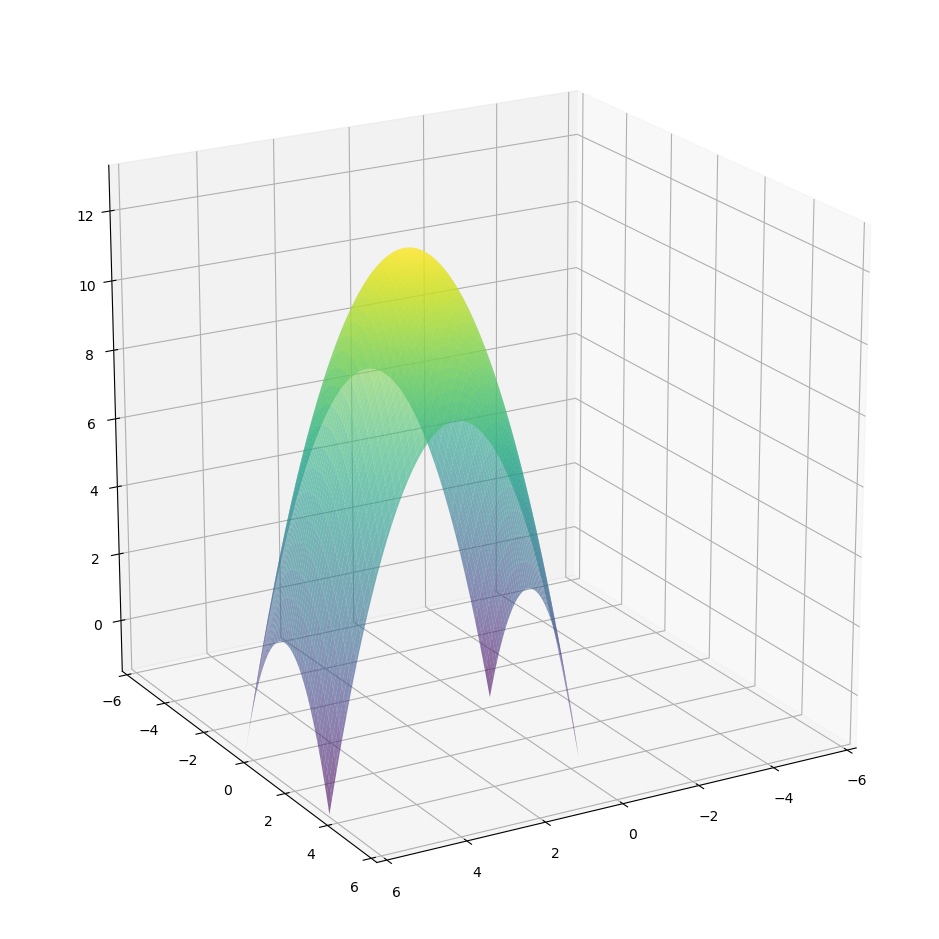

MovieWriter imagemagick unavailable; using Pillow instead.


In [276]:

# Encontre o índice do melhor candidato em cada geração
melhores = [result['z'].astype(float).idxmax() for result in result]

# Superfície
x = np.linspace(3-amp_x, 3+amp_x, 100)
y = np.linspace(2-amp_y, 2+amp_y, 100)
X, Y = np.meshgrid(x, y)
Z = função(X, Y)

# Figura
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# Inicialização dos pontos
scatter = ax.scatter([], [], [], color='blue', s=30)
melhor, = ax.plot([], [], [], 'o', color='red', markersize=12)

ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_zlim(np.min(Z), np.max(Z))

def update(frame):
    df = result[frame]
    xs = df['x'].values
    ys = df['y'].values
    zs = df['z'].values
    scatter._offsets3d = (xs, ys, zs)
    idx = melhores[frame]
    x_melhor = df.loc[idx, 'x']
    y_melhor = df.loc[idx, 'y']
    z_melhor = df.loc[idx, 'z']
    melhor.set_data([x_melhor], [y_melhor])
    melhor.set_3d_properties([z_melhor])
    ax.set_title(f'Geração {frame+1}')
    return scatter, melhor

ax.view_init(elev=20, azim=60)

anim = FuncAnimation(fig, update, frames=len(result), interval=500, blit=False)

ax.set_box_aspect([1,1,1])  # Proporção dos eixos
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()
anim.save('quadratic_function_3d.gif', writer='imagemagick', fps=2)
